# Author : Ranvirsing  Sisodiya
## Task 2 : Prediction using Unsupervised ML
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Tech Stack : KMeans, Scikit-learn, pandas, numpy, matplotlib

In [31]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris

In [32]:
df=load_iris() #importing the iris dataset
df1=pd.DataFrame(data= np.c_[df['data'], df['target']],columns= df['feature_names'] + ['species'])
print('Imported Data is :')
df1.head()

Imported Data is :


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


# Finding Value of k ie optimum number of clusters using Elbow Method

In [33]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
x=df1.iloc[:,:3].values
K=range(1,10)
KM = [KMeans(n_clusters=k).fit(x) for k in K]
cent=[k.cluster_centers_ for k in KM]
D_k = [cdist(x, cent, 'euclidean') for cent in cent]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

In [34]:
# Total with-in sum of square (wcss)
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss-wcss
varExplained = bss/tss*100

Text(0.5, 1.0, 'Elbow for KMeans clustering')

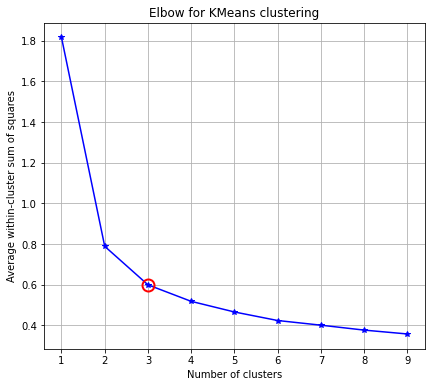

In [35]:
kIdx = 10-1
##### plot ###
kIdx = 2
# elbow curve
# Set the size of the plot
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'b*-')
plt.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12,
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

## Conclusion : From the above graph we can see that the point k=3 has low SSC. Therefor the value representing the Elbow in the graph is Number of Clusters

# K Means Cluster Data Visualization

In [36]:
model = KMeans(n_clusters=3, random_state=11)
model.fit(x)
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### We see that the clustering algorithm has assigned a cluster label for each record. Let’s compare this with the actual species label to understand the accuracy of grouping similar records.

In [37]:
from sklearn import metrics
df1['pred_species']=np.choose(model.labels_,[1,0,2]).astype(np.int64)  
print('Accuracy is : ',metrics.accuracy_score(df1.species, df1.pred_species))


Accuracy is :  0.88


In [38]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

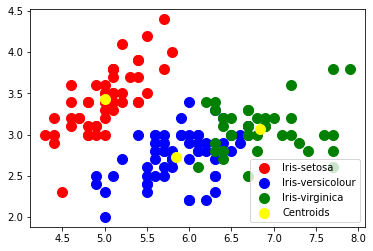

In [39]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()